<a href="https://colab.research.google.com/github/yogi2034/Deep-Learning/blob/main/data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
pwd

'/content'

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:2]

[PosixPath('datasets/flower_photos/tulips/8523133474_d2c0845b54.jpg'),
 PosixPath('datasets/flower_photos/tulips/14097328354_4f1469a170.jpg')]

In [7]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses=list(data_dir.glob('roses/*'))
roses[:3]

[PosixPath('datasets/flower_photos/roses/18741313803_1bbf842fc6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5332550500_ab341aefd8.jpg'),
 PosixPath('datasets/flower_photos/roses/5897035797_e67bf68124_n.jpg')]

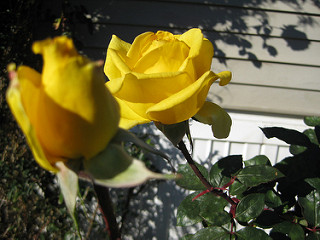

In [31]:
PIL.Image.open(roses[8])

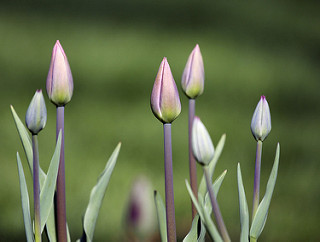

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[49]))


In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(213, 320, 3)

In [15]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 93s 1s/step - loss: 1.4035 - accuracy: 0.4023
Epoch 2/10
86/86 [==============================] - 83s 967ms/step - loss: 1.0327 - accuracy: 0.5916
Epoch 3/10
86/86 [==============================] - 84s 972ms/step - loss: 0.8506 - accuracy: 0.6701
Epoch 4/10
86/86 [==============================] - 83s 966ms/step - loss: 0.6743 - accuracy: 0.7420
Epoch 5/10
86/86 [==============================] - 82s 953ms/step - loss: 0.4812 - accuracy: 0.8278
Epoch 6/10
86/86 [==============================] - 87s 1s/step - loss: 0.2822 - accuracy: 0.9004
Epoch 7/10
86/86 [==============================] - 83s 963ms/step - loss: 0.1580 - accuracy: 0.9560
Epoch 8/10
86/86 [==============================] - 85s 985ms/step - loss: 0.1130 - accuracy: 0.9673
Epoch 9/10
86/86 [==============================] - 83s 964ms/step - loss: 0.0832 - accuracy: 0.9749
Epoch 10/10
86/86 [==============================] - 83s 965ms/step - loss: 0.0388 - accuracy: 0.

In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 309ms/step - loss: 1.9145 - accuracy: 0.6078


[1.9145067930221558, 0.6078431606292725]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 261ms/step


array([[-1.484649  ,  4.330808  , -2.4967308 , -1.9532136 ,  4.4942007 ],
       [ 4.740156  ,  2.5595078 ,  1.008589  , -6.9436474 ,  2.953513  ],
       [-1.9352225 ,  0.9533449 ,  7.219643  ,  0.92034954, -5.224173  ],
       ...,
       [ 2.8137522 ,  1.0536795 ,  3.25167   ,  7.592947  , -2.255293  ],
       [ 8.989217  , -0.6738297 , -3.745798  , -4.7494073 ,  5.991193  ],
       [ 0.2993698 , 10.071235  , -5.697944  ,  8.990694  , -2.74029   ]],
      dtype=float32)

In [23]:
score=tf.nn.softmax(predictions[0])

In [24]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.3653374e-03, 4.5799512e-01, 4.9624749e-04, 8.5456442e-04,
       5.3928870e-01], dtype=float32)>

In [25]:
np.argmax(score)

4

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

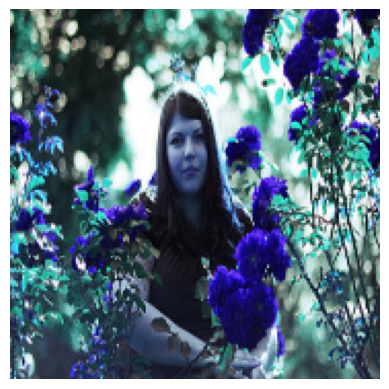

In [27]:
plt.axis('off')
plt.imshow(X[0])

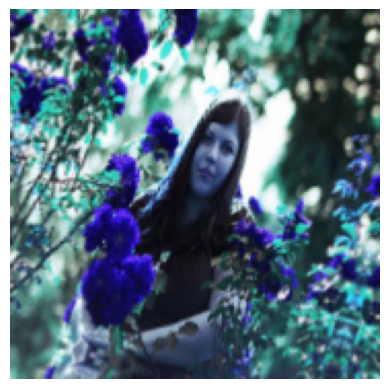

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 97s 1s/step - loss: 1.2629 - accuracy: 0.4618
Epoch 2/10
86/86 [==============================] - 95s 1s/step - loss: 1.0418 - accuracy: 0.5770
Epoch 3/10
86/86 [==============================] - 95s 1s/step - loss: 0.9475 - accuracy: 0.6326
Epoch 4/10
86/86 [==============================] - 96s 1s/step - loss: 0.8582 - accuracy: 0.6690
Epoch 5/10
86/86 [==============================] - 96s 1s/step - loss: 0.8165 - accuracy: 0.6886
Epoch 6/10
86/86 [==============================] - 96s 1s/step - loss: 0.7733 - accuracy: 0.6937
Epoch 7/10
86/86 [==============================] - 100s 1s/step - loss: 0.7202 - accuracy: 0.7166
Epoch 8/10
86/86 [==============================] - 96s 1s/step - loss: 0.6878 - accuracy: 0.7300
Epoch 9/10
86/86 [==============================] - 97s 1s/step - loss: 0.6731 - accuracy: 0.7376
Epoch 10/10
86/86 [==============================] - 96s 1s/step - loss: 0.6388 - accuracy: 0.7533


In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 299ms/step - loss: 0.7402 - accuracy: 0.7309


[0.7402322888374329, 0.7309368252754211]